# Instrucciones.

El objetivo de este ejercicios es utilizar el algoritmo de K-means para clasificar un conjunto de datos en un número óptimo de clases.

El conjunto de datos registra el gasto de clientes en 6 tipos de productos  en la tienda de un mayorista.

Utilizando la métrica *Siloueutte*, encontrar el número óptimo de cumulos a utilizar y se deben desplegar los cumulos encontrados. Considere unicamente los campos 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper' y 'Delicassen'.

Repetir esto utilizando PCA para reducir la dimensionalidad de los datos a 2 dimensiones y/o 3 dimensiones.


In [35]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_score
import seaborn as sns


In [2]:
df = pd.read_csv('Wholesale_customers_data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


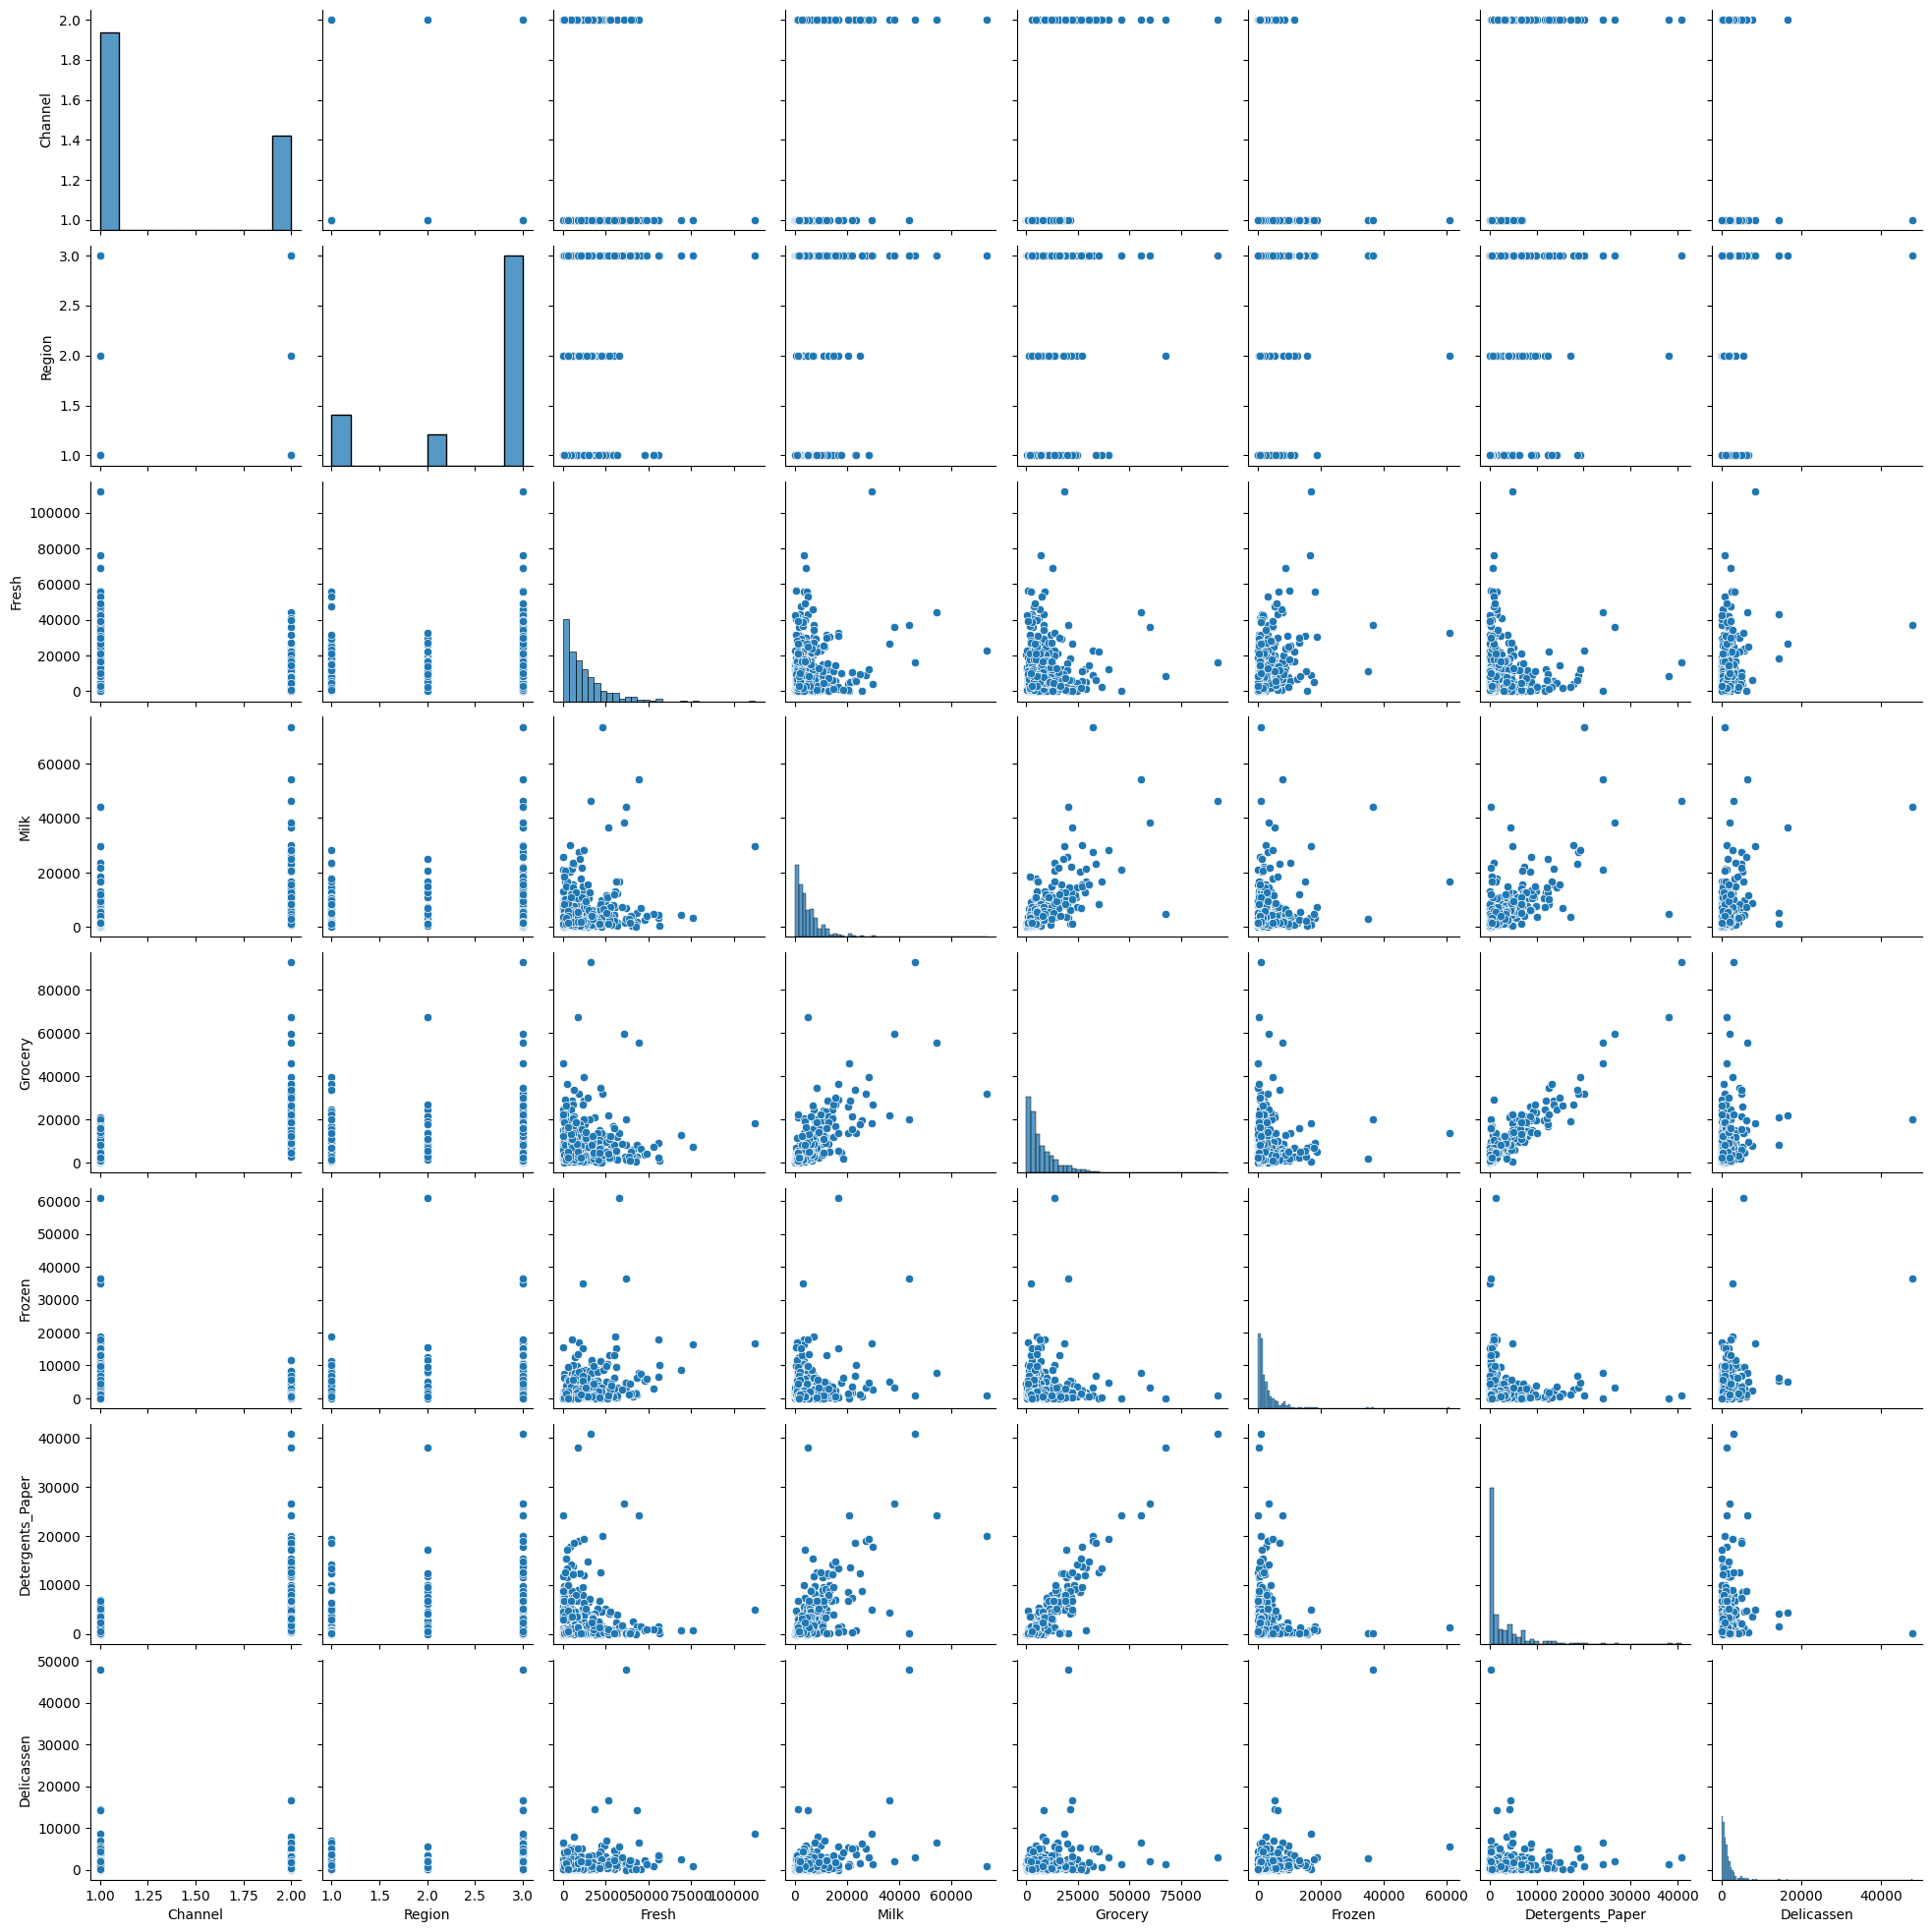

In [5]:
sns.pairplot(data=df);

### Choosing the items columns

In [6]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
df_knn = df.loc[:, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]

In [8]:
df_knn

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


### Scaling dataset

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
df_knn_scale = sc.fit_transform(df_knn)

In [37]:
df_scaled  = pd.DataFrame(df_knn_scale, columns=df_knn.columns)

In [39]:
df_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


#### Function to get elbow graph

In [18]:
def elbow_graph(df):
    knn = range(1, 11)
    inertias = []
    for k in knn:
        model = KMeans(n_clusters=k, init='k-means++', random_state=123)
        model.fit(df)
        inertias.append(model.inertia_)

    # Plot ks vs inertias
    plt.plot(knn, inertias, '-o')
    plt.title('Elbow plot')
    plt.xlabel('Number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(knn)
    plt.show()

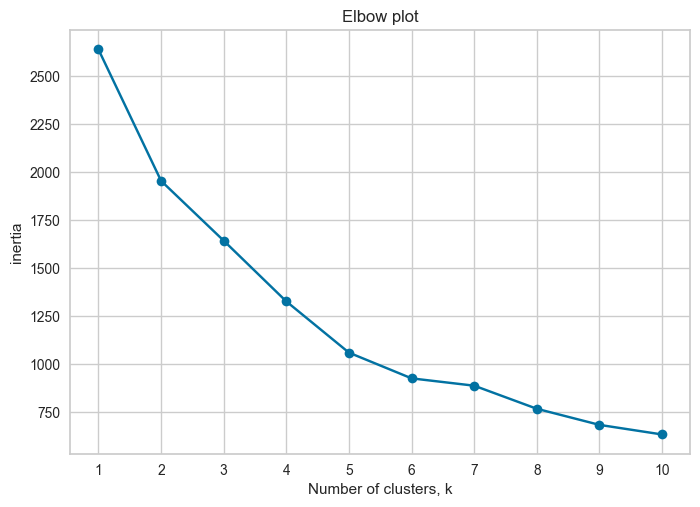

In [40]:
elbow_graph(df_scaled)

#### Silhoutte score

In [41]:
for i in range(2, 12):
    labels=cluster.KMeans(n_clusters=i,random_state=200,n_init='auto').fit(df_scaled).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(silhouette_score(df_scaled,labels,metric="euclidean", random_state=123)))

Silhouette score for k(clusters) = 2 is 0.5472146913441881
Silhouette score for k(clusters) = 3 is 0.5428636478701424
Silhouette score for k(clusters) = 4 is 0.3867036842467239
Silhouette score for k(clusters) = 5 is 0.3826884443677439
Silhouette score for k(clusters) = 6 is 0.343072244684369
Silhouette score for k(clusters) = 7 is 0.3125361976161709
Silhouette score for k(clusters) = 8 is 0.3227220935861094
Silhouette score for k(clusters) = 9 is 0.3099778372384812
Silhouette score for k(clusters) = 10 is 0.33644181328743966
Silhouette score for k(clusters) = 11 is 0.24152995496668123


#### Silhouette Graph function

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer

In [43]:
# Reference https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html

def silhouette_graph(df, num_k):
    
    fig, ax = plt.subplots(4, 2, figsize=(15,8))
    for k in range(2, num_k + 1):
        '''
        Create KMeans instance for different number of clusters
        '''
        model = KMeans(n_clusters=k, init='k-means++', random_state=111)
        q, mod = divmod(k, 2)
        '''
        Create SilhouetteVisualizer instance with KMeans instance
        Fit the visualizer
        '''
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q-1][mod])
        visualizer.fit(df) 

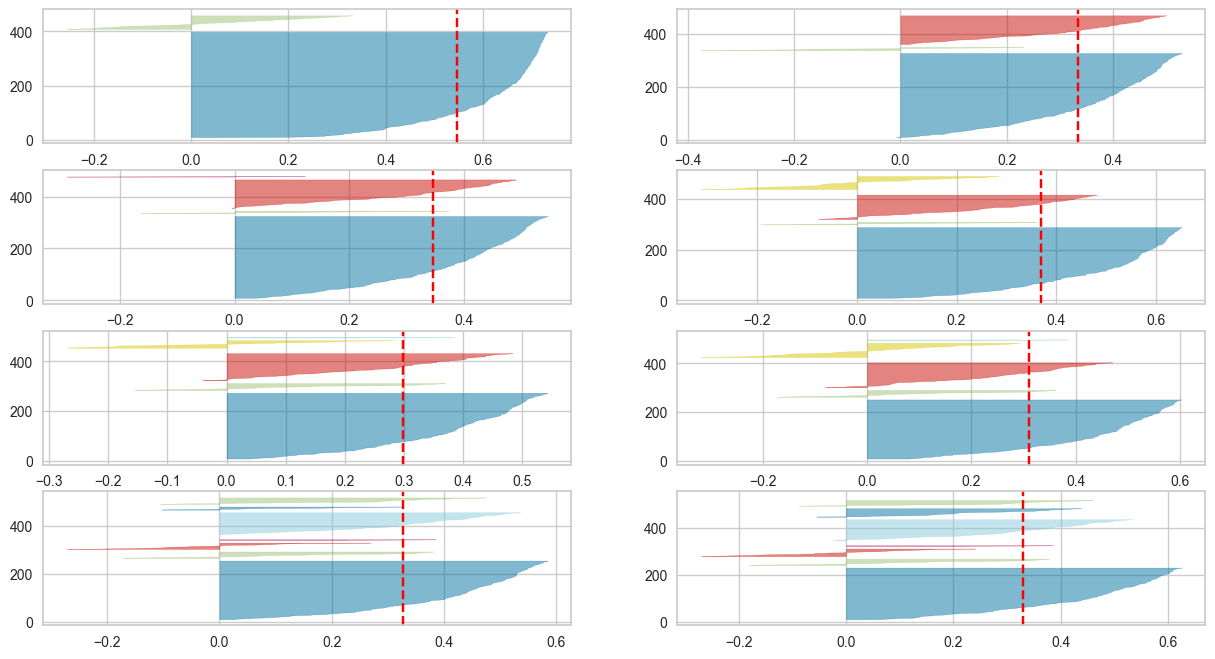

In [44]:
silhouette_graph(df_scaled, 9)

### PCA

In [45]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=2, random_state=123)

In [49]:
pca_res = pca.fit_transform(df_scaled)

In [50]:
pca_df = pd.DataFrame(pca_res, columns=['PCA_1' , 'PCA_2'])

In [51]:
pca_df.head()

,PCA_1,PCA_2
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434


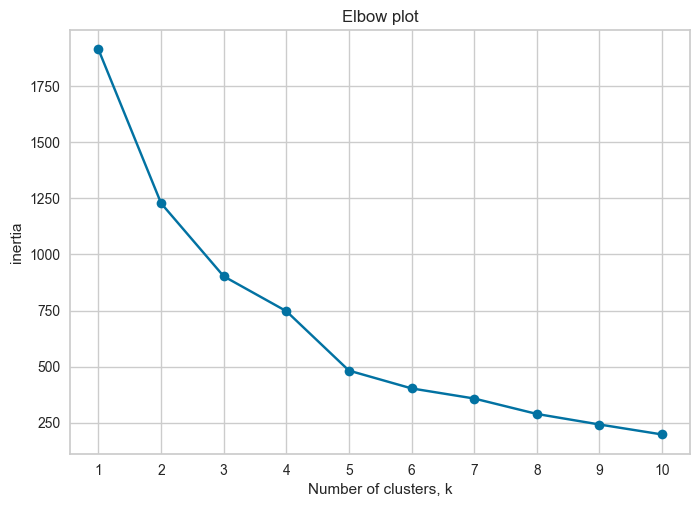

In [52]:
elbow_graph(pca_df)

In [55]:
for i in range(2, 12):
    labels=cluster.KMeans(n_clusters=i,random_state=200,n_init='auto').fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(silhouette_score(pca_df,labels,metric="euclidean", random_state=123)))

Silhouette score for k(clusters) = 2 is 0.7104379112321128
Silhouette score for k(clusters) = 3 is 0.4697008857414048
Silhouette score for k(clusters) = 4 is 0.48521964473348206
Silhouette score for k(clusters) = 5 is 0.48023121065141594
Silhouette score for k(clusters) = 6 is 0.48086945741690745
Silhouette score for k(clusters) = 7 is 0.4037442942248468
Silhouette score for k(clusters) = 8 is 0.43814094404285564
Silhouette score for k(clusters) = 9 is 0.42832497202894265
Silhouette score for k(clusters) = 10 is 0.424406788517532
Silhouette score for k(clusters) = 11 is 0.42798078397697503


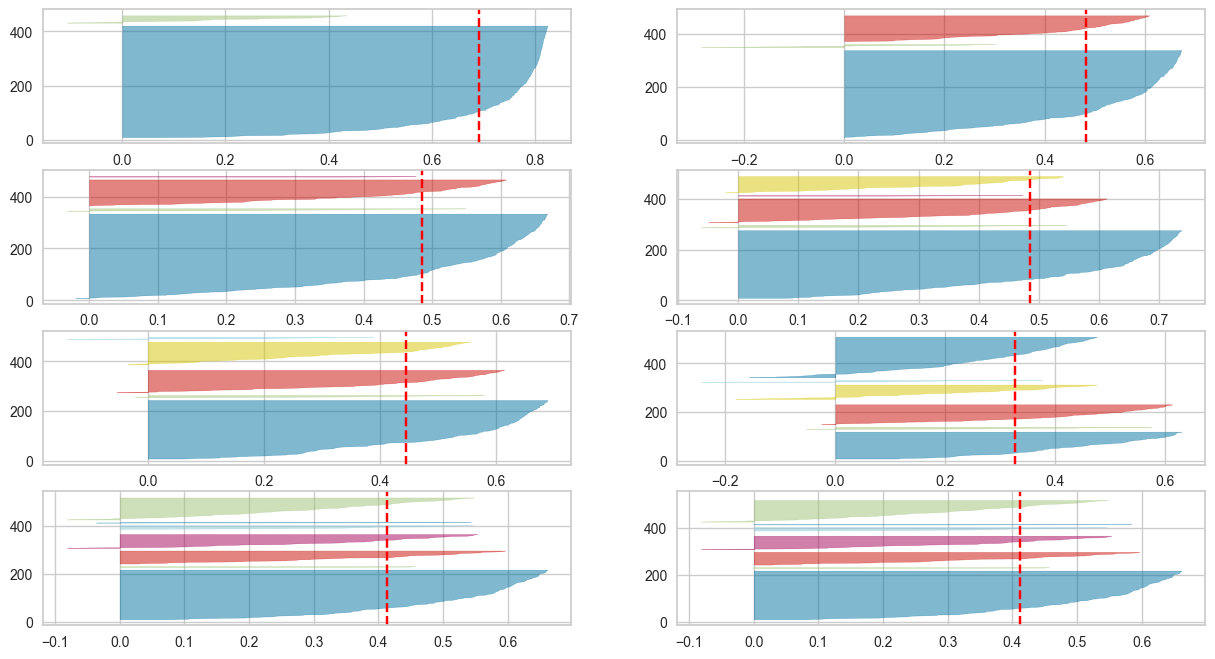

In [54]:
silhouette_graph(pca_df, 9)

### KNN 2 and 5 

In [56]:
def kmeans(df, num_k):
    model = KMeans(n_clusters=num_k, init='k-means++', random_state=111)
    model.fit(df)
    return model

In [57]:
kmeans_2 = kmeans(pca_df, 2)
kmeans_5 = kmeans(pca_df, 5)

In [58]:
pca_df['Cluster_2'] = kmeans_2.labels_
pca_df['Cluster_5'] = kmeans_5.labels_

#### 2 Clusters

<Axes: xlabel='PCA_1', ylabel='PCA_2'>

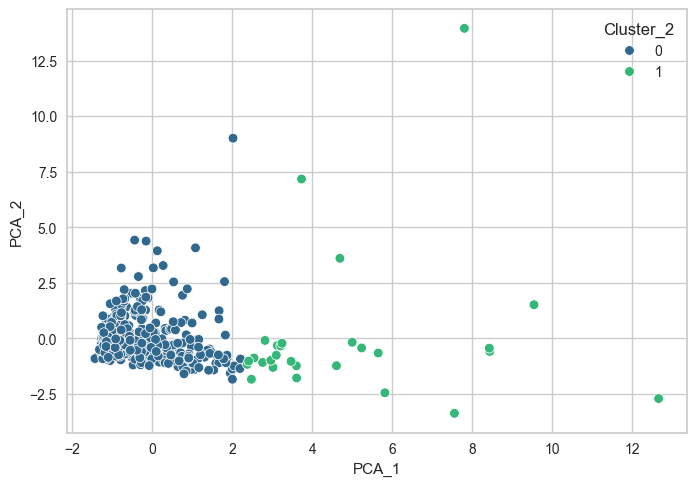

In [60]:
sns.scatterplot(x="PCA_1", y="PCA_2",hue = 'Cluster_2',  data=pca_df, palette='viridis');

#### 5 Clusters

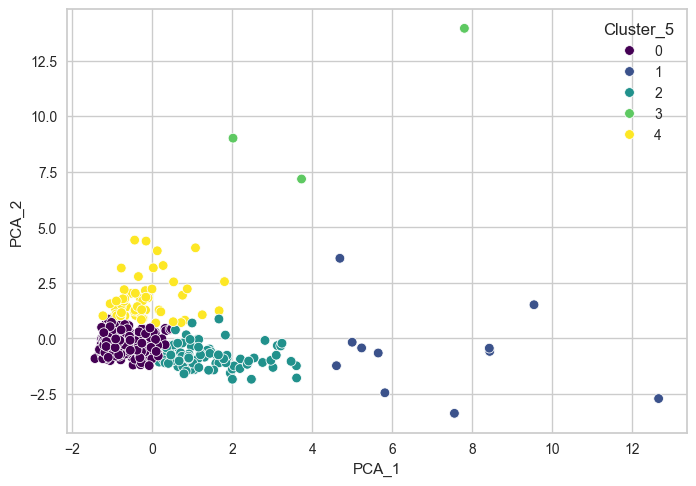

In [61]:
sns.scatterplot(x="PCA_1", y="PCA_2",hue = 'Cluster_5',  data=pca_df, palette='viridis');